# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 6 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu


##  <u>References and sources </u>

Perceptron.Breast

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

In [10]:
np.random.seed(42)

#### Code the solution

#### Load the dataset


In [11]:
digits = datasets.load_digits()
X = digits.data
X = X.astype("float32") / 255
Y = digits.target
class_names = digits.target_names
X.shape, Y.shape, class_names

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [12]:
digits_df = pd.DataFrame(X, columns=digits.feature_names)
digits_df['output_digit'] = Y
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output_digit
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.023529,0.050980,0.039216,0.000000,0.000000,0.0,0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.043137,0.062745,0.039216,0.000000,0.0,1
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.011765,0.043137,0.062745,0.035294,0.0,2
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.0,0.0,0.0,0.031373,...,0.0,0.0,0.0,0.027451,0.050980,0.050980,0.035294,0.000000,0.0,3
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.007843,0.062745,0.015686,0.000000,0.0,4


#### Converting digits to binary classifier

In [13]:
df_numeric = pd.get_dummies(digits_df, columns=['output_digit'], prefix=['output_digit'])


converted = ['output_digit_0', 'output_digit_1', 'output_digit_2', 'output_digit_3', 
             'output_digit_4', 'output_digit_5', 'output_digit_6', 'output_digit_7',
             'output_digit_8', 'output_digit_9']

df_numeric

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,output_digit_0,output_digit_1,output_digit_2,output_digit_3,output_digit_4,output_digit_5,output_digit_6,output_digit_7,output_digit_8,output_digit_9
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.000000,0.0,0.0,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.000000,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.000000,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.000000,0.0,0.0,0.031373,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.000000,0.0,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.015686,0.039216,0.050980,0.023529,0.000000,0.0,0.0,0.003922,...,0,0,0,0,0,0,0,0,0,1
1793,0.0,0.0,0.023529,0.062745,0.050980,0.043137,0.003922,0.0,0.0,0.000000,...,1,0,0,0,0,0,0,0,0,0
1794,0.0,0.0,0.003922,0.043137,0.058824,0.003922,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
1795,0.0,0.0,0.007843,0.039216,0.027451,0.000000,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1


#### Train a single layer perceptron model on the training data and compute accuracy of the model on the test data. Output a non-normalized confusion matrix for the test set prediction results.

Accuracy of perceptron on training set: 0.99
Accuracy of perceptron on test set: 0.99


Test set results for output_digit_0 (0.99)
[[324   0]
 [  2  34]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


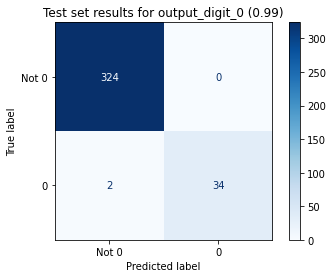

Accuracy of perceptron on training set: 0.95
Accuracy of perceptron on test set: 0.94


Test set results for output_digit_1 (0.94)
[[324   0]
 [ 20  16]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


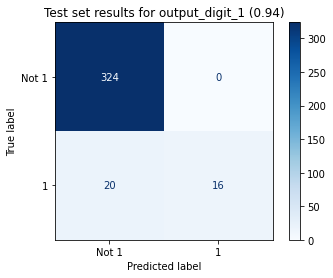

Accuracy of perceptron on training set: 0.99
Accuracy of perceptron on test set: 0.99


Test set results for output_digit_2 (0.99)
[[325   0]
 [  2  33]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


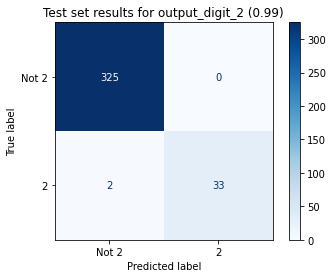

Accuracy of perceptron on training set: 0.98
Accuracy of perceptron on test set: 0.98


Test set results for output_digit_3 (0.98)
[[323   0]
 [  7  30]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


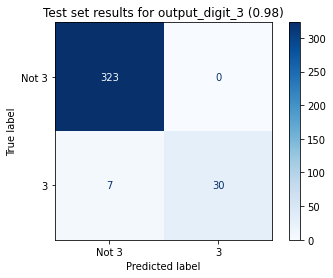

Accuracy of perceptron on training set: 0.98
Accuracy of perceptron on test set: 0.97


Test set results for output_digit_4 (0.97)
[[324   0]
 [ 11  25]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


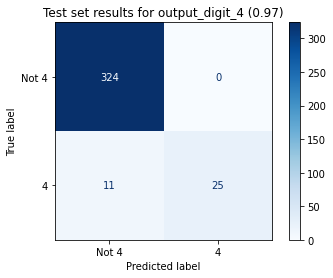

Accuracy of perceptron on training set: 0.99
Accuracy of perceptron on test set: 0.99


Test set results for output_digit_5 (0.99)
[[323   0]
 [  3  34]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


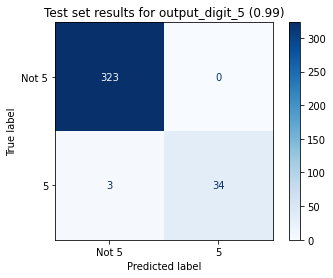

Accuracy of perceptron on training set: 0.99
Accuracy of perceptron on test set: 1.00


Test set results for output_digit_6 (1.00)
[[324   0]
 [  1  35]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


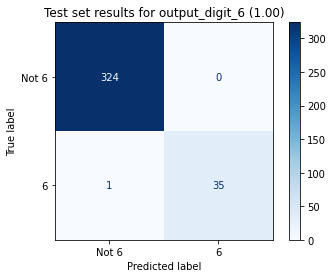

Accuracy of perceptron on training set: 0.98
Accuracy of perceptron on test set: 0.99


Test set results for output_digit_7 (0.99)
[[324   0]
 [  5  31]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


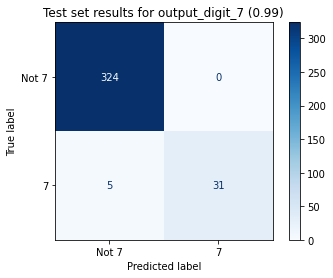

Accuracy of perceptron on training set: 0.95
Accuracy of perceptron on test set: 0.94


Test set results for output_digit_8 (0.94)
[[325   0]
 [ 22  13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


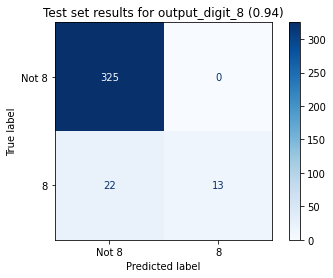

Accuracy of perceptron on training set: 0.93
Accuracy of perceptron on test set: 0.92


Test set results for output_digit_9 (0.92)
[[324   0]
 [ 30   6]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


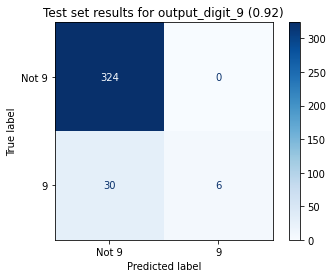

In [14]:
for i in range(10):
    Y_new = df_numeric[converted[i]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_new, test_size=0.2, random_state=0, stratify=Y)
    
    model = Perceptron(tol=1e-3, random_state=0).fit(X_train, Y_train)
    print('Accuracy of perceptron on training set: {:.2f}'.format(model.score(X_train, Y_train)))
    print('Accuracy of perceptron on test set: {:.2f}'.format(model.score(X_test, Y_test)))
    
    model_acc = "{:.2f}".format(model.score(X_test, Y_test))
    title = "Test set results for " + converted[i] + " (" + model_acc + ")"
    print('\n')
    
    
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                display_labels=['Not ' + str(i), str(i)],
                                cmap=plt.cm.Blues,
                                normalize=None)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()